In [ ]:
pip install ucimlrepo

In [ ]:
pip install scikeras

In [ ]:
from ucimlrepo import fetch_ucirepo
# link : https://archive.ics.uci.edu/dataset/186/wine+quality


# dataset discussion :
# The dataset is concerned with the different features of
# Portugese wine, with the goal to perform several physiochemical
# tests on it.


# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [ ]:
# import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
# classify training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# standardize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# define the model
model = Sequential([
    Dense(11, activation="relu", kernel_initializer = "normal", input_shape=(11,)),
    Dense(10, kernel_initializer = "normal", activation="softmax")
])

# indicate learning rate for adam optimizer, compile
adam_opt = Adam(learning_rate = 0.1)
model.compile(optimizer= adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train_norm, y_train_cat, validation_data = (X_test_norm, y_test_cat), epochs = 10)
print(history.history.keys())

Epoch 1/10
153/153 [==============================] - 3s 9ms/step - loss: 1.2153 - accuracy: 0.4988 - val_loss: 1.2255 - val_accuracy: 0.4812
Epoch 2/10
153/153 [==============================] - 1s 5ms/step - loss: 1.1298 - accuracy: 0.5248 - val_loss: 1.1641 - val_accuracy: 0.5169
Epoch 3/10
153/153 [==============================] - 1s 4ms/step - loss: 1.1279 - accuracy: 0.5055 - val_loss: 1.1249 - val_accuracy: 0.5237
Epoch 4/10
153/153 [==============================] - 1s 4ms/step - loss: 1.1237 - accuracy: 0.5277 - val_loss: 1.1424 - val_accuracy: 0.4954
Epoch 5/10
153/153 [==============================] - 1s 3ms/step - loss: 1.1354 - accuracy: 0.5203 - val_loss: 1.2038 - val_accuracy: 0.4628
Epoch 6/10
153/153 [==============================] - 1s 4ms/step - loss: 1.1365 - accuracy: 0.5177 - val_loss: 1.1233 - val_accuracy: 0.5218
Epoch 7/10
153/153 [==============================] - 1s 4ms/step - loss: 1.1320 - accuracy: 0.5273 - val_loss: 1.1611 - val_accuracy: 0.5083
Epoch 

In [ ]:
results = model.evaluate(X_test_norm, y_test_cat, verbose = 1)
print('Test loss, Test acc:', results)

51/51 [==============================] - 0s 2ms/step - loss: 1.1067 - accuracy: 0.5268
Test loss, Test acc: [1.1066856384277344, 0.52676922082901]


In [ ]:
estimators = [('standardize', StandardScaler()),
             ('mlp', KerasClassifier(model = model, epochs=10, verbose = 0))]

pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10)
results_base = cross_val_score(pipeline, X_train_norm, y_train_cat, cv=kfold, scoring='accuracy')

print("Results: %.4f (%.4f) Accuracy" % (results_base.mean(), results_base.std()))

Results: 0.5573 (0.0190) Accuracy


In [ ]:
print(results_base)

[0.53893443 0.55532787 0.56673511 0.57905544 0.57494867 0.58932238
 0.54414784 0.53182752 0.55852156 0.5338809 ]


In [ ]:
# define the model
model_new = Sequential([
    Dense(11, activation="relu", kernel_initializer = "normal", input_shape=(11,)),
    Dense(6, kernel_initializer="normal", activation="relu"),
    Dense(6, kernel_initializer="normal", activation="relu"),
    Dense(10, kernel_initializer = "normal", activation="softmax")
])

# indicate learning rate for adam optimizer, compile
adam_opt2 = Adam(learning_rate = 0.005)
model_new.compile(optimizer = adam_opt2, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# train the model
history2 = model_new.fit(X_train_norm, y_train_cat, validation_data = (X_test_norm, y_test_cat), epochs = 10)
print(history2.history.keys())

Epoch 1/10
153/153 [==============================] - 3s 7ms/step - loss: 1.4628 - accuracy: 0.4197 - val_loss: 1.2678 - val_accuracy: 0.4172
Epoch 2/10
153/153 [==============================] - 1s 4ms/step - loss: 1.2514 - accuracy: 0.4448 - val_loss: 1.2216 - val_accuracy: 0.5040
Epoch 3/10
153/153 [==============================] - 1s 3ms/step - loss: 1.1803 - accuracy: 0.5035 - val_loss: 1.1290 - val_accuracy: 0.5329
Epoch 4/10
153/153 [==============================] - 0s 3ms/step - loss: 1.1025 - accuracy: 0.5406 - val_loss: 1.1144 - val_accuracy: 0.5126
Epoch 5/10
153/153 [==============================] - 1s 4ms/step - loss: 1.0741 - accuracy: 0.5439 - val_loss: 1.1035 - val_accuracy: 0.5255
Epoch 6/10
153/153 [==============================] - 1s 4ms/step - loss: 1.0691 - accuracy: 0.5511 - val_loss: 1.0859 - val_accuracy: 0.5378
Epoch 7/10
153/153 [==============================] - 1s 3ms/step - loss: 1.0649 - accuracy: 0.5519 - val_loss: 1.1043 - val_accuracy: 0.5206
Epoch 

In [ ]:
model_new.evaluate(X_test_norm, y_test_cat)

51/51 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.5434


[1.0745112895965576, 0.5433846116065979]

In [ ]:
estimators = [('standardize', StandardScaler()),
             ('mlp', KerasClassifier(model = model_new, epochs=10, verbose = 0))]

pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10)

results_new = cross_val_score(pipeline, X_train, y_train_cat, cv=kfold, scoring='accuracy')
print("Results: %.4f (%.4f) Accuracy" % (results_new.mean(), results_new.std()))

Results: 0.5577 (0.0141) Accuracy


In [ ]:
print(results_new)

[0.55122951 0.56352459 0.55030801 0.54620123 0.59548255 0.55852156
 0.55646817 0.56262834 0.54620123 0.54620123]


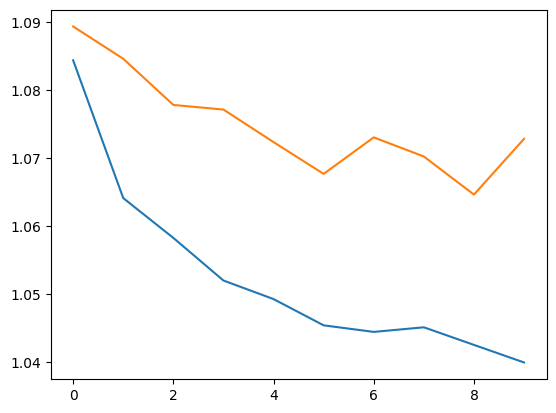

In [ ]:
L1 = plt.plot(history.history['loss'],label='loss')
L2 = plt.plot(history.history['val_loss'],label='val_loss')

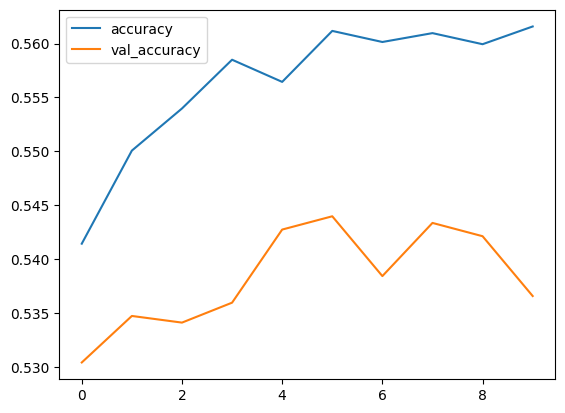

In [ ]:
L3 = plt.plot(history.history['accuracy'],label='accuracy')
L4 =plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

<h2> <b> == REGRESSION ==

In [ ]:
# classify training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# standardize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Dense(11, input_shape=(11,), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation="linear"))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

baseline_model = baseline_model()

In [ ]:
estimator = KerasRegressor(model = baseline_model, epochs = 10, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.55 (0.06) MSE


In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=baseline_model, epochs=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv = kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.55 (0.07) MSE


In [ ]:
def bigger_model():
    model = Sequential()
    model.add(Dense(11, input_shape=(11,), activation='relu', kernel_initializer='normal'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model = bigger_model, epochs = 10, verbose = 0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.58 (0.07) MSE


<h2> <b> == CONCLUSION ==

After performing this activity, I have learned about different optimization techniques in order to improve my model's performance. Although the results don't show it as much, I'd say it was because of the dataset, as the numbers that show up before and after the optimization are pretty close. I have used the same dataset for both tasks as the page suggests that it is eligible, both for classification and regression. That being said, I have also gained knowledge regarding model evaulation with the use of kfold, and making specific adjustments in order to see its effect. This activity also taught me how smaller and bigger networks would have an impact on the result, which can be done by adding more and more hidden layers. I would like to know more regarding this topic, and preferrably perform it on a dataset that yields a better result than the one that I have used for this activity.